In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
image_size = (128,128)
batch_size = 32

# Train_Val_Split

In [3]:
train_data = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\INDIAN FOOD\Indian Food Images",
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=123
)

val_data = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Bhaypreet\OneDrive\Pictures\IIT ROPAR\data_science_projects\INDIAN FOOD\Indian Food Images",
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=123
)
class_names = train_data.class_names

Found 4000 files belonging to 80 classes.
Using 3200 files for training.
Found 4000 files belonging to 80 classes.
Using 800 files for validation.


# Normalization

In [4]:
def normalizer(image,label):
    image = tf.cast(image,tf.float32)/255.0
    return image,label

train_data = train_data.map(normalizer)
val_data = val_data.map(normalizer)

# Model Architecture

In [5]:
model = tf.keras.Sequential([
    
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),
    
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.4),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

       tf.keras.layers.Dense(len(class_names), activation='softmax')
])


C:\Users\Bhaypreet\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_LR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6, verbose=1)


In [7]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

# Model_Training

In [8]:
history = model.fit(
    train_data,
    validation_data = val_data,
    epochs=20,callbacks = [reduce_LR,earlystop])

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.0350 - loss: 4.6932 - val_accuracy: 0.0100 - val_loss: 31.3657 - learning_rate: 0.0010
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.2113 - loss: 3.4394 - val_accuracy: 0.0113 - val_loss: 103.6299 - learning_rate: 0.0010
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.4243 - loss: 2.5250 - val_accuracy: 0.0113 - val_loss: 163.4280 - learning_rate: 0.0010
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1830s 18s/step - accuracy: 0.6552 - loss: 1.5991 - val_accuracy: 0.0125 - val_loss: 128.8862 - learning_rate: 0.0010
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8493 - loss: 0.9028 - val_accuracy: 0.0125 - val_loss: 109.8133 - learning_rate: 0.0010
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.9383 - loss: 0.4656 - val_accuracy: 0.0712 - val_loss: 30.4438 - learning_rate: 0.0010
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.965

# Accuracy Plot

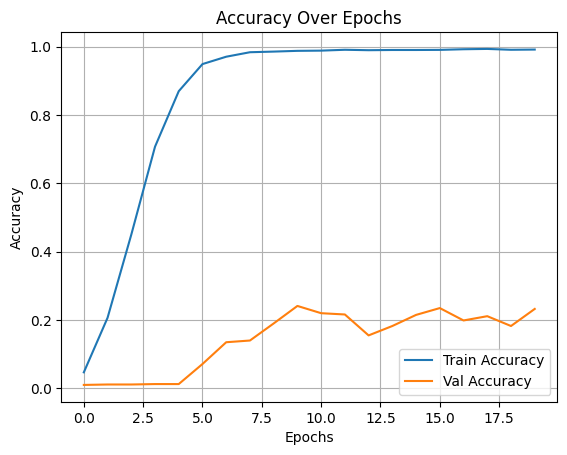

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot

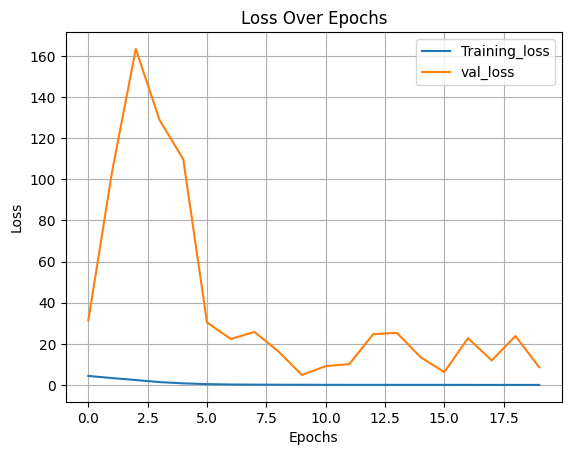

In [13]:
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


# Saving Model For Deployment

In [12]:
model.save("indian_food_model.h5")
